In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle
import scipy as sp
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Paste the path to the dataset and load the dataset.
df = pd.read_csv(r"data\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Check for missing values and duplicates
print("Missing values:\n", df.isna().sum())
print("\nDuplicated rows:", df.duplicated().sum())

Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Duplicated rows: 0


In [5]:
df = df.dropna()

In [6]:
# Explore the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


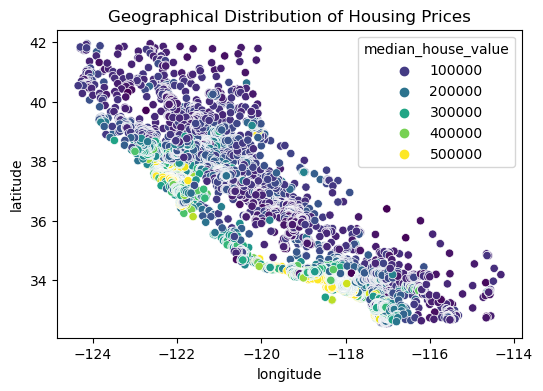

In [7]:
# Scatter plot between longitude and latitude
plt.figure(figsize=(6, 4))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='median_house_value', palette='viridis')
plt.title('Geographical Distribution of Housing Prices')
plt.show()

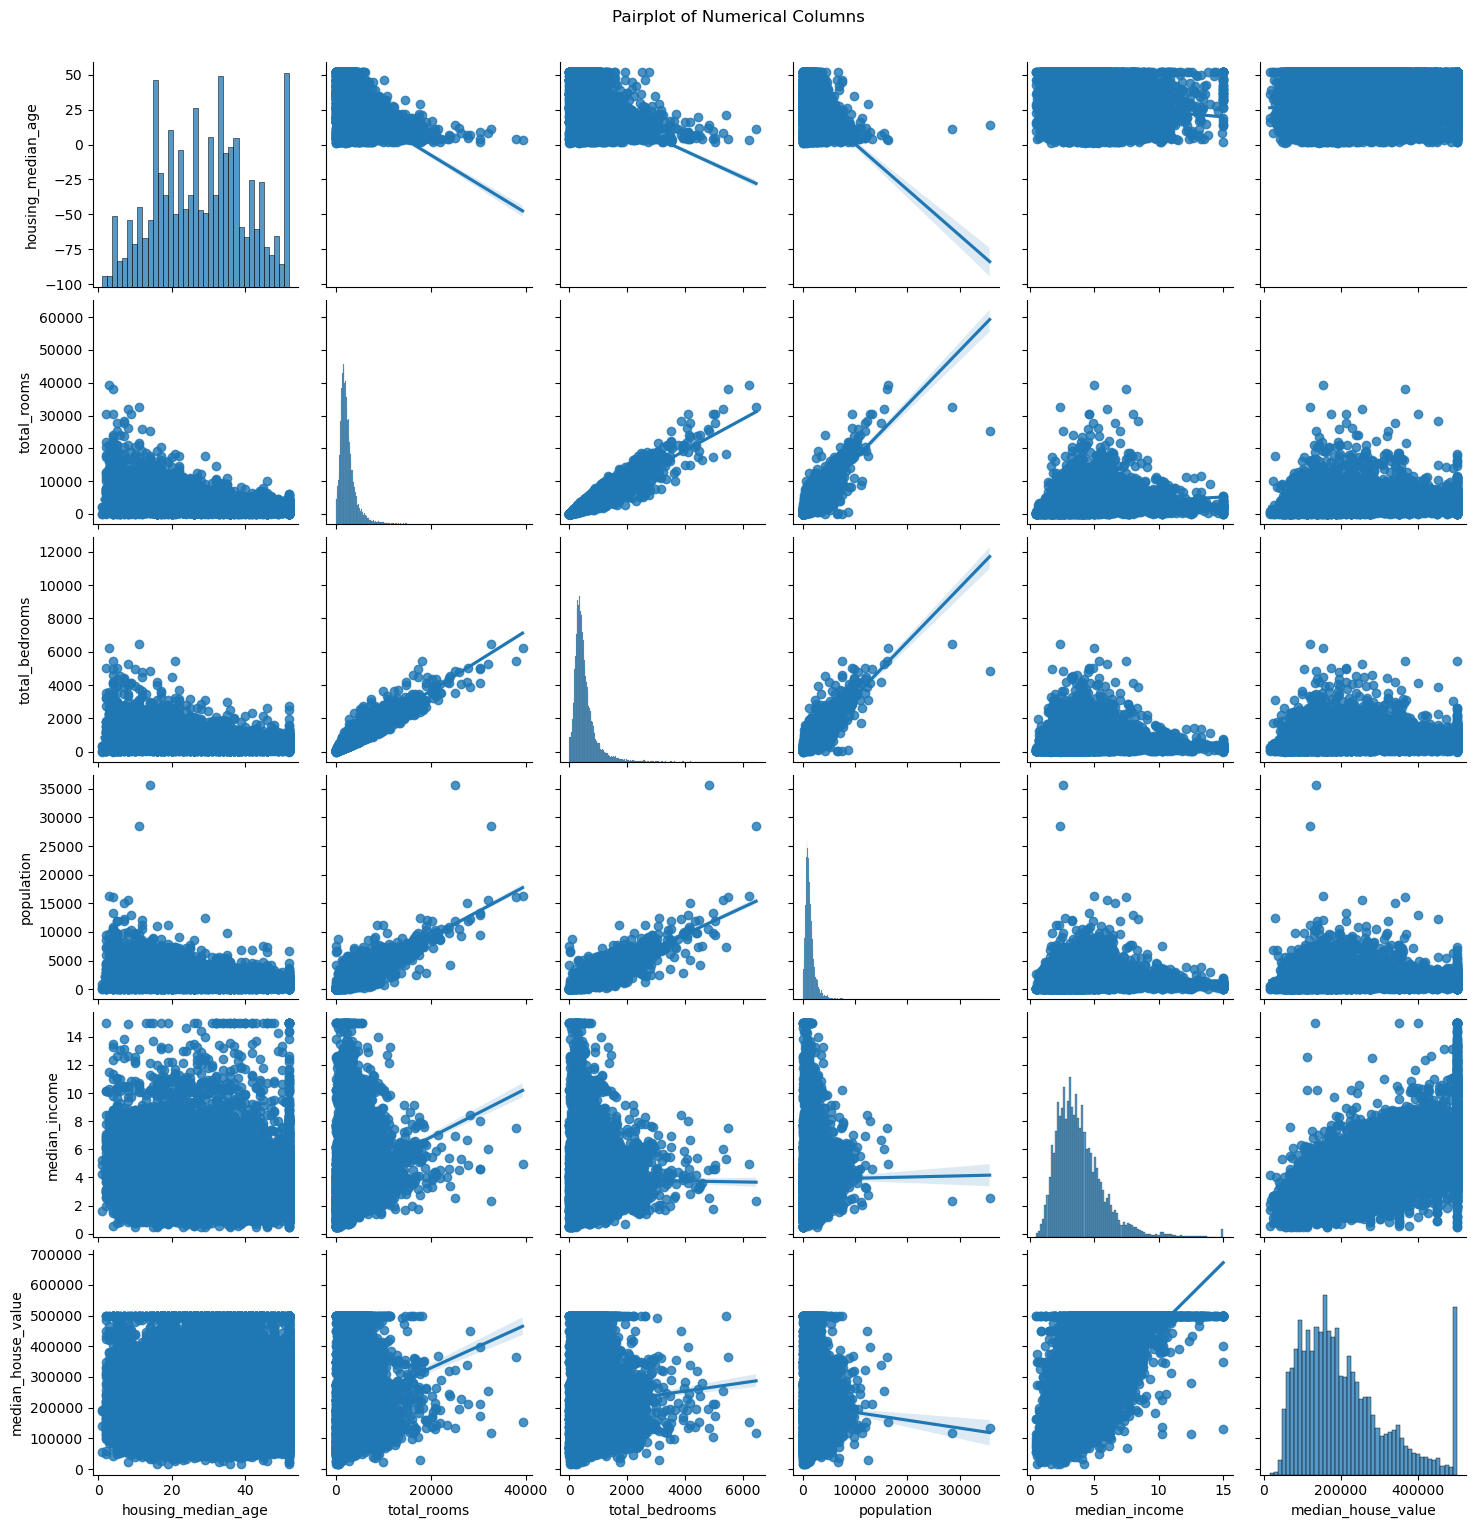

In [8]:
# Pairplot for numerical columns
sns.pairplot(df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income', 'median_house_value']], kind='reg')
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

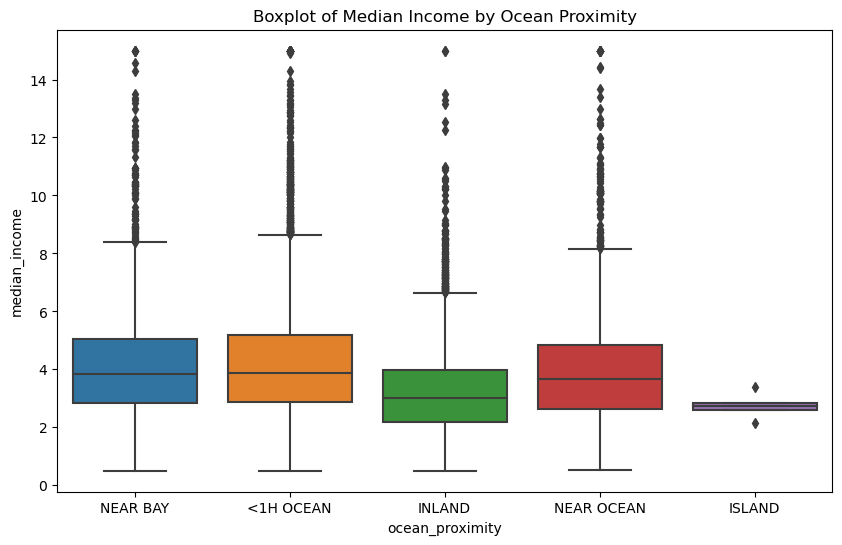

In [9]:
# Boxplot for median_income
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=df)
plt.title('Boxplot of Median Income by Ocean Proximity')
plt.show()

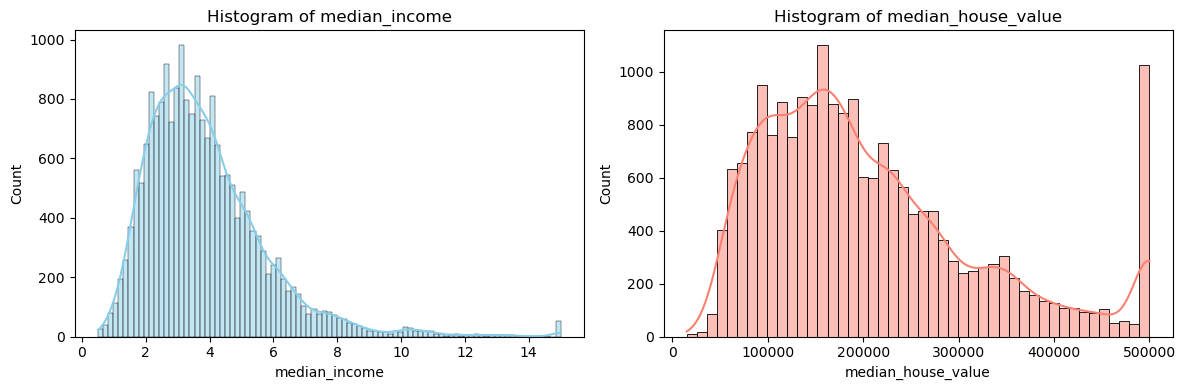

In [10]:
columns_to_plot = ['median_income', 'median_house_value']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(12, 4))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[column], kde=True, color=colors[i])
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

# Median income is right skwed.The target feature median_house_value is doesn't follow uniform distribution. so we will have to log transform it. 

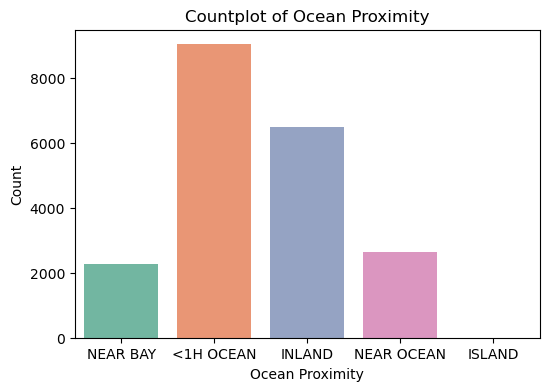

In [11]:
# Countplot of ocean_proximity
plt.figure(figsize=(6, 4))
sns.countplot(x='ocean_proximity', data=df, palette='Set2')
plt.title('Countplot of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

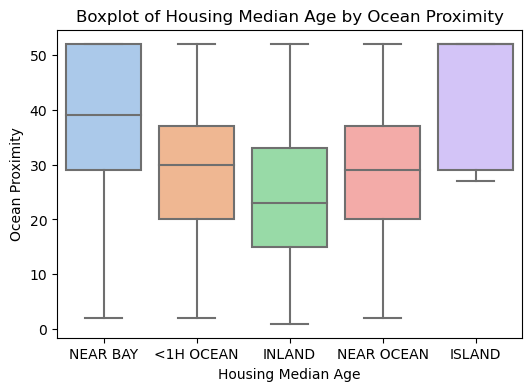

In [12]:
# Boxplot for housing_median_age
plt.figure(figsize=(6, 4))
sns.boxplot(x='ocean_proximity',y='housing_median_age', data=df, palette='pastel')
plt.title('Boxplot of Housing Median Age by Ocean Proximity')
plt.xlabel('Housing Median Age')
plt.ylabel('Ocean Proximity')
plt.show()

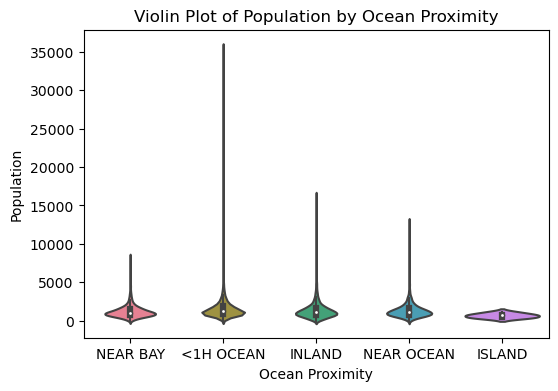

In [13]:
# Violin plot of population
plt.figure(figsize=(6, 4))
sns.violinplot(x='ocean_proximity', y='population', data=df, palette='husl')
plt.title('Violin Plot of Population by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

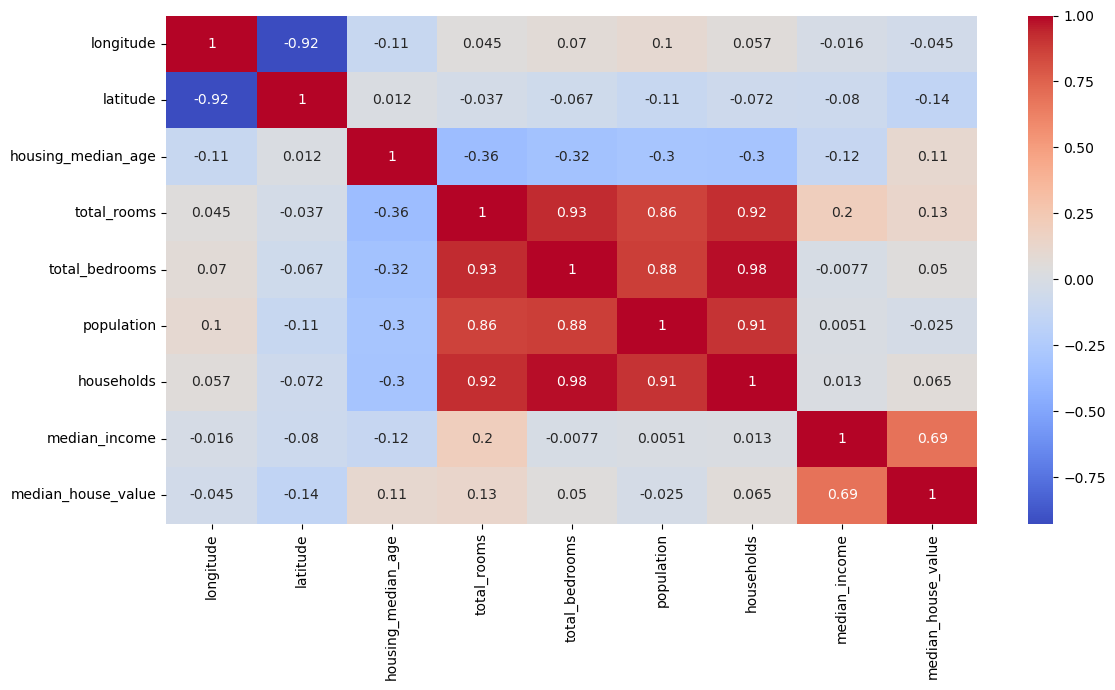

In [14]:
# Correlation matrix heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

Immedidately, we can see that there are few very highly correlated features. We should definetly examine them further. However, remember that `correlation is not causation`.

Here i have created a function called `train_test_split_results` which encompasses the entire code and feature engineering columns. This way i can get the results 
by executing a single block of cell instead of excuting each cell.

Let us check the metrics we obtain without dropping any columns or any feature engineering and then proceed accordingly.

In [15]:
def train_test_split_results(path):
    df = pd.read_csv(path)
    df = df.dropna()

    df = pd.get_dummies(df, drop_first=True,dtype=int)

    X = df.drop(['median_house_value'], axis=1)
    y = df['median_house_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    numeric_features = X.select_dtypes(include=['float', 'int']).columns
    numeric_transformer = StandardScaler()

    preprocessor = ColumnTransformer(transformers=[('num_cols', numeric_transformer, numeric_features)])

    final_pipeline = Pipeline([('preprocessor', preprocessor),
                              ("LogisticRegression", KNeighborsRegressor(n_jobs=-1))])
    
    final_pipeline.fit(X_train, y_train)
    y_pred = final_pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")

train_test_split_results(r'data\housing.csv')

R-squared (R2): 0.72
Mean Absolute Error (MAE): 41262.65
Mean Squared Error (MSE): 3869248053.21


The metrics aren't particularly great to say the least.

Columns we will be feature engineering with ie columns that are highly correlated:
- total_rooms
- households
- total_bedrooms
- median_house_value
- median_income
- population

I tried experimenting by dropping some of the highly correlated columns & feature engineering them as above. It didn't yield expected results. Instead, the r2 score dropped from 0.72 to 0.53 after dropping 3-4 columns. Therefore, dropping highly correlated columns is not the right approach remember "Correlation is not causation". Let's try with feature engineering instead.

In [16]:
def train_test_split_results(data_path):
    df = pd.read_csv(data_path)
    df = df.dropna()

    df = pd.get_dummies(df, drop_first=True, dtype=int)

    df['median_rooms_per_house'] = df['total_rooms'] / df['median_house_value']
    df['log_median_house_value'] = np.log1p(df['median_house_value'])

    df = df.drop(columns=['total_rooms', 'median_house_value'])

    X = df.drop(['log_median_house_value'], axis=1)
    y = df['log_median_house_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    numeric_features = X.select_dtypes(include=['float', 'int']).columns
    numeric_transformer = StandardScaler()

    preprocessor = ColumnTransformer(transformers=[('num_cols', numeric_transformer, numeric_features)])

    final_pipeline = Pipeline([('preprocessor', preprocessor),
                               ("KNeighborsRegressor", KNeighborsRegressor(n_jobs=-1))])

    final_pipeline.fit(X_train, y_train)
    y_pred = final_pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")

train_test_split_results(r'data\housing.csv')

R-squared (R2): 0.86
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.05


Feature engineering just one column `df['median_rooms_per_house'] = df['total_rooms'] / df['median_house_value']` increased our r2_score from 0.72 to 0.86. Which is an good increase. You could also experiment with other columns and perhaps get better results.

In [17]:
df['median_rooms_per_house'] = df['total_rooms'] / df['median_house_value']
df['log_median_house_value'] = np.log1p(df['median_house_value'])

In [18]:
df = df.drop(columns=['total_rooms', 'median_house_value'])

In [19]:
# Split data into features and target
X = df.drop(['log_median_house_value'], axis=1)
y = df['log_median_house_value']

In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Select all nmeric values.
numeric_features = X.select_dtypes(include=['float', 'int']).columns
numeric_transformer = StandardScaler()

In [22]:
# Create preprocessing step using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', numeric_transformer, numeric_features)
    ])

In [23]:
# Create the final pipeline along with the chosen model
final_pipeline = Pipeline([
                        ('preprocessor', preprocessor),
                        ("LogisticRegression", KNeighborsRegressor(n_neighbors=5, n_jobs=-1))
                        ])

In [24]:
# Train a Logistic regression model using pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_rooms_per_house'],
      dtype='object'))])),
                ('LogisticRegression', KNeighborsRegressor(n_jobs=-1))])

In [25]:
# Make predictions on the test set
y_pred = final_pipeline.predict(X_test)

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
# Display metrics
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

R-squared (R2): 0.87
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.04


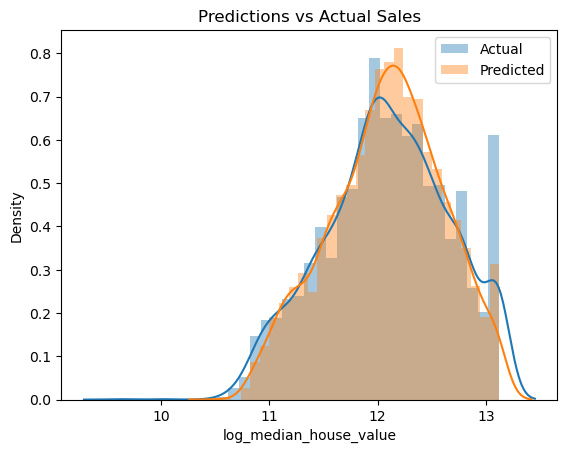

In [28]:
# Visualize the predictions
sns.distplot(y_test, label ='Actual')
sns.distplot(y_pred, label ='Predicted')
plt.title("Predictions vs Actual Sales")
plt.legend()
plt.show()

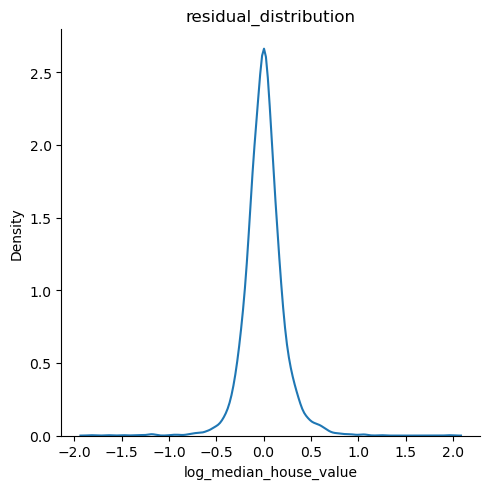

In [29]:
# Visualize the residuals
residual = y_test - y_pred
sns.displot(residual,kind='kde')
plt.title("residual_distribution")
plt.tight_layout()
plt.show()

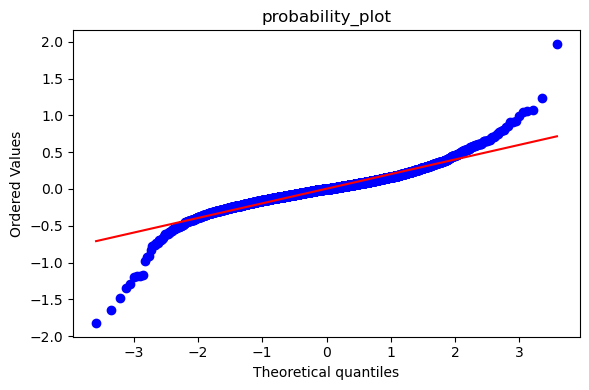

In [30]:
# Probability plot of residuals
fig,ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.title("probability_plot")
plt.tight_layout()
plt.show()

In [31]:
# Save the trained model to a file using pickle
model_to_save = final_pipeline
with open(r'house_price_model.pkl','wb') as model_file:
    pickle.dump(model_to_save, model_file)


## Conclusion 🏁

In conclusion, the Housing Price Prediction project successfully utilized K-Nearest Neighbors regression to estimate housing prices. The model achieved commendable performance with an R-squared score of 0.86, MAE of 0.12, and MSE of 0.03.

### Final Thoughts:
- Feature engineering, such as log-transforming the target variable, contributed to improved model accuracy.
- Continuous monitoring and updates with new housing data can further enhance the model's predictive capabilities.

This project serves as a foundational step in leveraging machine learning for housing price prediction, with opportunities for ongoing improvement and application in real-world scenarios. 🏡💰

## Questions and Concepts 🤔💡

1. **Explain the k-Nearest Neighbors algorithm and its underlying principle.**

2. **What is the significance of the 'k' parameter in KNN, and how does it impact the algorithm's performance?**

3. **Describe the distance metrics commonly used in KNN and their characteristics. How does the choice of distance metric influence the algorithm?**

4. **Explain the concept of the decision boundary in KNN. How is it determined, and what role does it play in classification?**

5. **Discuss the trade-off between a small and large value of 'k' in KNN. How does each choice affect the model's bias and variance?**

6. **How does KNN handle categorical features? Are there any specific considerations or techniques for dealing with non-numeric attributes?**

7. **What are the challenges or limitations of the KNN algorithm, and how can these challenges be mitigated?**

8. **Explain the concept of feature scaling in the context of KNN. Why is it important, and how does it impact the algorithm's performance?**

9. **Discuss strategies for selecting an optimal value for 'k' in KNN. Are there any common techniques or heuristics used for this purpose?**

10. **In what scenarios would you recommend using KNN as a machine learning algorithm? Are there specific types of datasets or problems where KNN excels or struggles?**